In [1]:
import os.path as osp
import data.citylearn_challenge_2022_phase_1 as competition_data
import pandas as pd

In [9]:
import csv
action_file_path = osp.join(osp.dirname(competition_data.__file__), 'perfect_actions.csv')

col_names = ["month",
    "day_type",
    "hour",
    "outdoor_dry_bulb_temperature",
    "outdoor_dry_bulb_temperature_predicted_6h",
    "outdoor_dry_bulb_temperature_predicted_12h",
    "outdoor_dry_bulb_temperature_predicted_24h",
    "outdoor_relative_humidity",
    "outdoor_relative_humidity_predicted_6h",
    "outdoor_relative_humidity_predicted_12h",
    "outdoor_relative_humidity_predicted_24h",
    "diffuse_solar_irradiance",
    "diffuse_solar_irradiance_predicted_6h",
    "diffuse_solar_irradiance_predicted_12h",
    "diffuse_solar_irradiance_predicted_24h",
    "direct_solar_irradiance",
    "direct_solar_irradiance_predicted_6h",
    "direct_solar_irradiance_predicted_12h",
    "direct_solar_irradiance_predicted_24h",
    "carbon_intensity",
    "non_shiftable_load",
    "solar_generation",
    "electrical_storage_soc",
    "net_electricity_consumption",
    "electricity_pricing",
    "electricity_pricing_predicted_6h",
    "electricity_pricing_predicted_12h",
    "electricity_pricing_predicted_24h",
    "action"]

num_consumptions = 6
consumption_col_names = []
for i in range(num_consumptions):
    consumption_col_names.append(f"consumption_hour{i+1}")

all_col_names = col_names + consumption_col_names
#
# with open(action_file_path,newline='') as f:
#     r = csv.reader(f)
#     data = [line for line in r]
# with open(action_file_path,'w',newline='') as f:
#     w = csv.writer(f)
#     w.writerow(all_col_names)
#     w.writerows(data)



In [10]:
df = pd.read_csv(action_file_path)
df_original = df
df.head()

,month,day_type,hour,outdoor_dry_bulb_temperature,outdoor_dry_bulb_temperature_predicted_6h,outdoor_dry_bulb_temperature_predicted_12h,outdoor_dry_bulb_temperature_predicted_24h,outdoor_relative_humidity,outdoor_relative_humidity_predicted_6h,outdoor_relative_humidity_predicted_12h,...,electricity_pricing_predicted_6h,electricity_pricing_predicted_12h,electricity_pricing_predicted_24h,action,consumption_hour1,consumption_hour2,consumption_hour3,consumption_hour4,consumption_hour5,consumption_hour6
0,7,7,24,20.0,18.3,22.8,20.0,84.0,81.0,68.0,...,0.22,0.22,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,7,24,20.0,18.3,22.8,20.0,84.0,81.0,68.0,...,0.22,0.22,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,7,24,20.0,18.3,22.8,20.0,84.0,81.0,68.0,...,0.22,0.22,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,7,24,20.0,18.3,22.8,20.0,84.0,81.0,68.0,...,0.22,0.22,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,7,24,20.0,18.3,22.8,20.0,84.0,81.0,68.0,...,0.22,0.22,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df = df[["month",
    "day_type",
    "hour",
    "non_shiftable_load",
    "solar_generation",
    "electrical_storage_soc",
    "net_electricity_consumption",
    "action"] + consumption_col_names]
df.head()

,month,day_type,hour,non_shiftable_load,solar_generation,electrical_storage_soc,net_electricity_consumption,action,consumption_hour1,consumption_hour2,consumption_hour3,consumption_hour4,consumption_hour5,consumption_hour6
0,7,7,24,2.275800e+00,0.0,0.0,2.275800e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,7,24,2.188750e+00,0.0,0.0,2.188750e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,7,24,1.009623e-07,0.0,0.0,1.009623e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,7,24,2.819150e+00,0.0,0.0,2.819150e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,7,24,7.714333e-01,0.0,0.0,7.714333e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut
groups = np.array([i%5 for i in range(len(df))])
logo = LeaveOneGroupOut()
y = df[["action"]]
X = df.drop(["action"], axis=1)
cv_iter = list(logo.split(X, y, groups))

In [13]:
# tpot.TPOTRegressor(generations=100, population_size=100,
#                      offspring_size=None, mutation_rate=0.9,
#                      crossover_rate=0.1,
#                      scoring='neg_mean_squared_error', cv=5,
#                      subsample=1.0, n_jobs=1,
#                      max_time_mins=None, max_eval_time_mins=5,
#                      random_state=None, config_dict=None,
#                      template=None,
#                      warm_start=False,
#                      memory=None,
#                      use_dask=False,
#                      periodic_checkpoint_folder=None,
#                      early_stop=None,
#                      verbosity=0,
#                      disable_update_check=False)

In [14]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y)

tpot_regressor = TPOTRegressor(generations=3, population_size=20, verbosity=2, n_jobs=-1, cv=cv_iter)
tpot_regressor.fit(X, y)
print(tpot_regressor.score(X, y))

C:\Users\Team Epoch A\Documents\Epoch III\citylearn-2022-starter-kit\venv\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/80 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0031130007329536135

Generation 2 - Current best internal CV score: -0.0031130007329536135

Generation 3 - Current best internal CV score: -0.0031130007329536135

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.9500000000000001, min_samples_leaf=3, min_samples_split=7, n_estimators=100)


C:\Users\Team Epoch A\Documents\Epoch III\citylearn-2022-starter-kit\venv\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Team Epoch A\Documents\Epoch III\citylearn-2022-starter-kit\venv\lib\site-packages\sklearn\metrics\_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


-0.0013854476466019525


In [15]:
tpot_regressor.export('tpot_exported_pipeline.py')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoLarsCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import RobustScaler
from tpot.builtins import StackingEstimator
from xgboost import XGBRegressor
import os.path as osp
import data.citylearn_challenge_2022_phase_1 as competition_data
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)


# NOTE: Make sure that the outcome column is labeled 'target' in the data file

action_file_path = osp.join(osp.dirname(competition_data.__file__), 'perfect_actions.csv')

tpot_data = pd.read_csv(action_file_path, sep=',', dtype=np.float64)

col_names = ["month",
    "day_type",
    "hour",
    "non_shiftable_load",
    "solar_generation",
    "electrical_storage_soc",
    "net_electricity_consumption",
    "action"]

num_consumptions = 10
consumption_col_names = []
for i in range(10):
    consumption_col_names.append(f"consumption_hour{i+1}")

all_col_names = col_names + consumption_col_names

y = tpot_data[["action"]]
X = tpot_data[all_col_names].drop(["action"], axis=1)

import numpy as np
from sklearn.model_selection import LeaveOneGroupOut
groups = np.array([i%5 for i in range(len(X))])
logo = LeaveOneGroupOut()
cv_iter = list(logo.split(X, y, groups))

training_features, testing_features, training_target, testing_target = \
    train_test_split(X, y, train_size=0.99, random_state=None)

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RidgeCV()),
    RobustScaler(),
    RandomForestRegressor(bootstrap=False, max_features=0.35000000000000003, min_samples_leaf=12, min_samples_split=18, n_estimators=100, verbose=0)
)

exported_pipeline.fit(training_features, training_target)

In [20]:
predictions = exported_pipeline.predict(testing_features)
from sklearn.metrics import mean_squared_error
mean_squared_error(testing_target, predictions)

C:\Users\philip\Storage\Epoch\citylearn-2022-starter-kit\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


0.0023434859989986626

In [ ]:
import joblib
joblib.dump(exported_pipeline, 'pipe.joblib')

[18:15:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:15:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




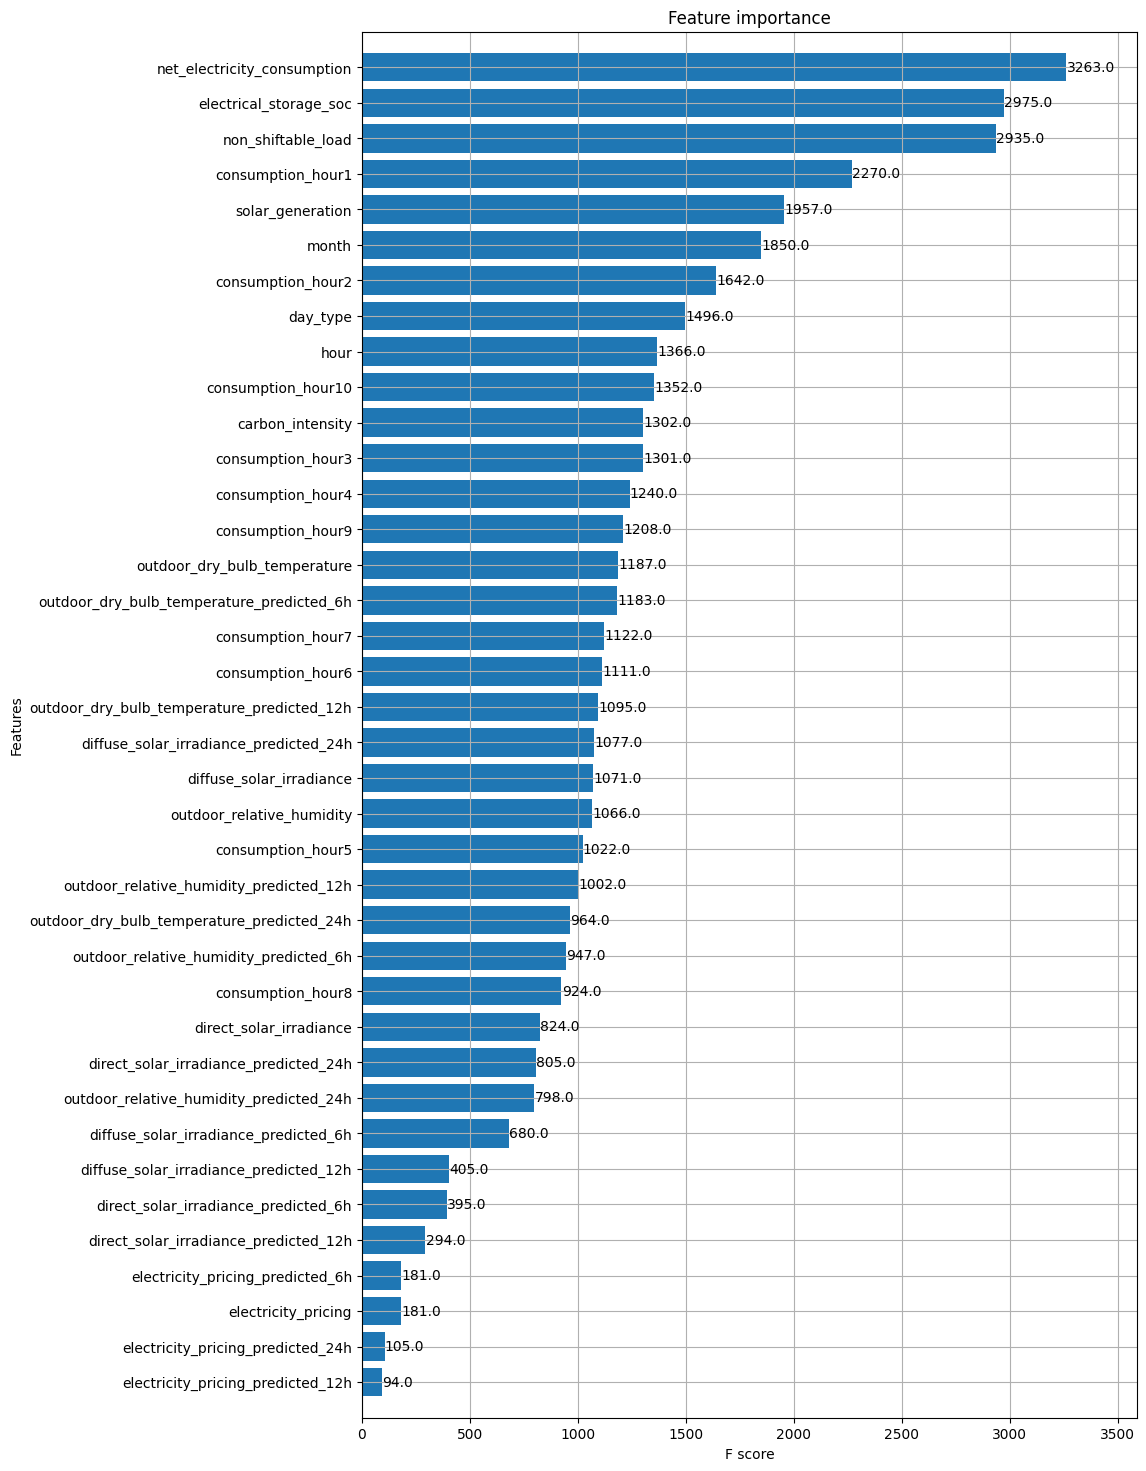

In [7]:
import xgboost as xgb

train_y = y
train_X = df_original.drop(["action"], axis=1)
xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)
remain_num = 99


from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10,18))
xgb.plot_importance(model, max_num_features=remain_num, height=0.8, ax=ax)
plt.show()